<div dir='rtl'>
در این بخش به پیش پردازش مجموعه داده ها می پردازیم.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

<div dir='rtl'>
در ابتدا باید ببنیم که تایپ هر داده به چه صورت است تا تصمیمات لازم برای پیش پردازش را بگیریم.
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetes_binary            70692 non-null  float64
 1   HighBP                     70692 non-null  float64
 2   High Cholesterol           70692 non-null  float64
 3   Cholesterol Check          70692 non-null  float64
 4   BMI                        70691 non-null  float64
 5   Smoker                     70692 non-null  float64
 6   Stroke                     70692 non-null  float64
 7   HeartDiseaseorAttack       70691 non-null  float64
 8   Physical Activity          70691 non-null  float64
 9   Fruits                     70690 non-null  float64
 10  Veggies                    70691 non-null  float64
 11  Heavy Alcohol Consumption  70691 non-null  float64
 12  Any Health Care            70690 non-null  float64
 13  No Doctor because of Cost  70690 non-null  flo

In [5]:
df.describe()

,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,Veggies,Heavy Alcohol Consumption,Any Health Care,No Doctor because of Cost,Mental Health,Physical Health,Difficulty Walking,Age
count,70692.000000,70692.000000,70692.000000,70692.000000,70691.000000,70692.000000,70692.000000,70691.000000,70691.000000,70690.000000,70691.000000,70691.000000,70690.000000,70690.000000,70691.000000,70691.000000,70690.000000,70691.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856955,0.475273,0.062171,0.147812,0.703032,0.611784,0.788771,0.042721,0.954958,0.093917,3.752062,5.810499,0.252737,8.584105
std,0.500004,0.495960,0.499342,0.155336,7.114000,0.499392,0.241468,0.354916,0.456926,0.487348,0.408183,0.202229,0.207397,0.291715,8.155682,10.062308,0.434585,2.852141
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,6.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000


<div dir='rtl'>
همانطور که دیده می شود تعداد از سطر ها مجموعه داده دارای مقادیر 
    nan
    و 
    null
    هستند.
</div>

In [6]:
df.isnull().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

In [7]:
df.isna().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

<div dir='rtl'>
همچنین در ستون های مربوط به داده های 
categorical
نیز مقادیر 
    null
    دیده می شود.

</div>

In [8]:
df.select_dtypes(['object']).isna().sum()

General Health    1
Sex               1
Education         1
Income            1
dtype: int64

<div dir='rtl'>
داده های با مقادیر باینری
</div>

In [9]:
# finding binary columns
bool_cols = [col for col in df 
             if np.isin(df[col].dropna().unique(), [0, 1]).all()]
bool_cols

['Diabetes_binary',
 'HighBP',
 'High Cholesterol',
 'Cholesterol Check',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'Physical Activity',
 'Fruits',
 'Veggies',
 'Heavy Alcohol Consumption',
 'Any Health Care',
 'No Doctor because of Cost',
 'Difficulty Walking']

<div dir='rtl'>
حال به بررسی مقادیر مربوط به هر متغیر
    categorical 
    می پردازیم تا اگر مقادیر بی ربط دیده ایم آنها را حذف یا جایگزین کنیم.
</div>

In [10]:
for c in df.select_dtypes(['object']).columns:
    print(f"---- {c} ---")
    print(df[c].value_counts())

---- General Health ---
Medium      23427
Good        19871
Low         13303
High         8282
Very Low     5808
Name: General Health, dtype: int64
---- Sex ---
female    38385
male      32306
Name: Sex, dtype: int64
---- Education ---
Cat6    26019
Cat5    20030
Cat4    19473
Cat3     3447
Cat2     1647
Cat1       75
Name: Education, dtype: int64
---- Income ---
Cat8       20645
Cat7       11425
Cat6       10287
Cat5        8010
Cat4        6658
Cat3        5556
Cat2        4498
Cat1        3611
Unknown        1
Name: Income, dtype: int64


<div dir='rtl'>
همانطور که دیده می شود یک سطر وجود دارد مقدار 
    income 
    آن 
    Unknown 
    است.
    از آنجایی که فقط یک سطر این ویژگی را دارد می توانیم با اطمینان از عملکرد مدل این سطر را حذف کنیم.
</div>

In [11]:
df.drop(df[df.Income == 'Unknown'].index , inplace= True)
for c in df.select_dtypes(['object']).columns:
    print(f"---- {c} ---")
    print(df[c].value_counts())

---- General Health ---
Medium      23427
Good        19871
Low         13302
High         8282
Very Low     5808
Name: General Health, dtype: int64
---- Sex ---
female    38384
male      32306
Name: Sex, dtype: int64
---- Education ---
Cat6    26019
Cat5    20029
Cat4    19473
Cat3     3447
Cat2     1647
Cat1       75
Name: Education, dtype: int64
---- Income ---
Cat8    20645
Cat7    11425
Cat6    10287
Cat5     8010
Cat4     6658
Cat3     5556
Cat2     4498
Cat1     3611
Name: Income, dtype: int64


In [12]:
df[df.isna().any(axis=1)]

,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
10000,0.0,0.0,1.0,1.0,21.0,1.0,1.0,0.0,0.0,NaN,...,1.0,0.0,Low,0.0,30.0,0.0,male,13.0,Cat5,Cat7
11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20000,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,NaN,0.0,Good,0.0,0.0,1.0,female,13.0,Cat3,Cat5
30000,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,NaN,Good,0.0,0.0,0.0,female,6.0,Cat6,Cat5
40000,1.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,NaN,male,8.0,Cat5,Cat7
50000,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,2.0,2.0,0.0,female,9.0,Cat6,Cat8


<div dir='rtl'>
حال داده هایی که متغیر 
    categorical 
    با مقدار
    null 
    دارند را حذف میکنیم.
    این تصمیم به این دلیل گرفته شده است که تعداد آن ها بسیار کم است.
</div>

In [13]:
df.dropna(subset=df.select_dtypes(['object']).columns, inplace=True)

In [14]:
df.select_dtypes(['object']).isna().sum()

General Health    0
Sex               0
Education         0
Income            0
dtype: int64

<div dir='rtl'>
همانطور که دیده می شود همچنان  داده های پرت در دیتاست وجود دارند. این داده ها مربوط به متغیر های عددی هستند که در فاز بعد به آن ها رسیدگی می شود.
</div>

In [15]:
df[df.isna().any(axis=1)]

,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
10000,0.0,0.0,1.0,1.0,21.0,1.0,1.0,0.0,0.0,NaN,...,1.0,0.0,Low,0.0,30.0,0.0,male,13.0,Cat5,Cat7
20000,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,NaN,0.0,Good,0.0,0.0,1.0,female,13.0,Cat3,Cat5
30000,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,NaN,Good,0.0,0.0,0.0,female,6.0,Cat6,Cat5
40000,1.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,NaN,male,8.0,Cat5,Cat7
50000,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,2.0,2.0,0.0,female,9.0,Cat6,Cat8


In [16]:
df.isna().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       1
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              1
No Doctor because of Cost    1
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           1
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

<div dir='rtl'>
در این بخش نام ستون هارا تغییر می دهیم.</div>

In [17]:
re_cols = { col:col.replace(" ", "_")   for col in df.columns if " " in col}
re_cols

{'High Cholesterol': 'High_Cholesterol',
 'Cholesterol Check': 'Cholesterol_Check',
 'Physical Activity': 'Physical_Activity',
 'Heavy Alcohol Consumption': 'Heavy_Alcohol_Consumption',
 'Any Health Care': 'Any_Health_Care',
 'No Doctor because of Cost': 'No_Doctor_because_of_Cost',
 'General Health': 'General_Health',
 'Mental Health': 'Mental_Health',
 'Physical Health': 'Physical_Health',
 'Difficulty Walking': 'Difficulty_Walking'}

In [18]:
df.rename(columns = re_cols, inplace = True)
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


**3- Normalization**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70690 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetes_binary            70690 non-null  float64
 1   HighBP                     70690 non-null  float64
 2   High_Cholesterol           70690 non-null  float64
 3   Cholesterol_Check          70690 non-null  float64
 4   BMI                        70689 non-null  float64
 5   Smoker                     70690 non-null  float64
 6   Stroke                     70690 non-null  float64
 7   HeartDiseaseorAttack       70690 non-null  float64
 8   Physical_Activity          70690 non-null  float64
 9   Fruits                     70689 non-null  float64
 10  Veggies                    70690 non-null  float64
 11  Heavy_Alcohol_Consumption  70690 non-null  float64
 12  Any_Health_Care            70689 non-null  float64
 13  No_Doctor_because_of_Cost  70689 non-null  flo

In [20]:
Y = df.Diabetes_binary
df.drop(columns=['Diabetes_binary'], inplace=True )
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes_binary, Length: 70690, dtype: float64

<div dir='rtl'>
در این جا ستون های با مقادیر باینری را داخل یک آرایه نگه می داریم. این ستون ها نیازی به نورمال سازی ندارند چرا که مقادیر آن ها یا یک است یا صفر.</div>

In [21]:
# finding binary columns
bool_cols = [col for col in df 
             if np.isin(df[col].dropna().unique(), [0, 1]).all()]
bool_cols

['HighBP',
 'High_Cholesterol',
 'Cholesterol_Check',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'Physical_Activity',
 'Fruits',
 'Veggies',
 'Heavy_Alcohol_Consumption',
 'Any_Health_Care',
 'No_Doctor_because_of_Cost',
 'Difficulty_Walking']

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [23]:
numeric_col = list(set(df.select_dtypes(['float64']).columns).difference(bool_cols))
cat_cols = list(df.select_dtypes(['object']).columns)
numeric_col

['Mental_Health', 'Age', 'Physical_Health', 'BMI']

In [24]:
len(numeric_col + cat_cols + bool_cols)

21

<div dir='rtl'>
    پردازش داده در این بخش اتفاق می افتد.
    برای داده های عددی در ابتدا 
    missing 
    ها با میانگین جایگزین می شوند و سپس با کمک
    <code>StandardScaler</code>
    نورمالایز می‌شوند.
    <br>
    داده های باینری
    missing 
    نیز با مقداری که بیشترین تکرار را دارد جایگزین می شود.
    <br>
    داده های 
    categorical 
    نیز 
    one hot encode 
    می شوند.
</div>

In [25]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)



full_pipeline = ColumnTransformer([
    ("num", numeric_transformer , numeric_col),
    ("cat", OneHotEncoder() , cat_cols),
    ("bin", SimpleImputer(strategy= 'most_frequent') , bool_cols)
],remainder='passthrough')

In [26]:
df_preprocessed = full_pipeline.fit_transform(df)

In [27]:
df_preprocessed.shape

(70690, 38)

<div dir='rtl'>
همانطور که دیده می شود هیچ داده 
    missing 
    ای دیگر نداریم.
</div>

In [28]:
np.count_nonzero(np.isnan(df_preprocessed))

0

We have successfully removed all the nan values.

<div dir='rtl'>
در این بخش به تعلیم مدل خود می پردازیم.
</div>

In [29]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, Y, test_size=0.2, random_state=123)

In [31]:
X_train.shape

(56552, 38)

In [32]:
xgbc = xgb.XGBClassifier(n_estimators=200, 
                         learning_rate=0.1, 
                         subsample=0.5,
                         colsample_bytree=1, 
                         max_depth=4,
                        eval_metric= 'auc',
                        verbosity = 1,
                        seed = 123)

In [33]:
xgbc.fit(X_train,y_train,
        early_stopping_rounds = 10,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        )

[0]	validation_0-auc:0.78426	validation_1-auc:0.77618


/home/alirezaak/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.80195	validation_1-auc:0.79323
[2]	validation_0-auc:0.80636	validation_1-auc:0.79843
[3]	validation_0-auc:0.81031	validation_1-auc:0.80176
[4]	validation_0-auc:0.81214	validation_1-auc:0.80370
[5]	validation_0-auc:0.81355	validation_1-auc:0.80436
[6]	validation_0-auc:0.81454	validation_1-auc:0.80587
[7]	validation_0-auc:0.81526	validation_1-auc:0.80617
[8]	validation_0-auc:0.81685	validation_1-auc:0.80731
[9]	validation_0-auc:0.81898	validation_1-auc:0.80898
[10]	validation_0-auc:0.81944	validation_1-auc:0.80980
[11]	validation_0-auc:0.82049	validation_1-auc:0.81117
[12]	validation_0-auc:0.82174	validation_1-auc:0.81219
[13]	validation_0-auc:0.82267	validation_1-auc:0.81285
[14]	validation_0-auc:0.82386	validation_1-auc:0.81375
[15]	validation_0-auc:0.82465	validation_1-auc:0.81413
[16]	validation_0-auc:0.82570	validation_1-auc:0.81474
[17]	validation_0-auc:0.82621	validation_1-auc:0.81541
[18]	validation_0-auc:0.82681	validation_1-auc:0.81583
[19]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

<div dir='rtl'>
    نمودار 
    AUC
    رسم شده از هر گام تعلیم نشان دهنده پیشرفت در تعلیم است.
</div>

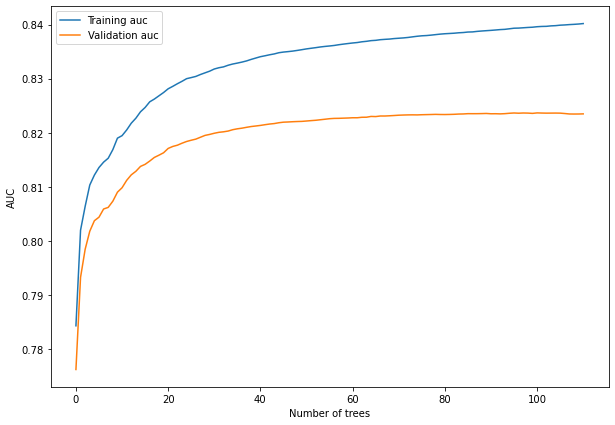

In [91]:
results = xgbc.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["auc"], label="Training auc")
plt.plot(results["validation_1"]["auc"], label="Validation auc")
plt.xlabel("Number of trees")
plt.ylabel("AUC")
plt.legend()

In [38]:
results

{'validation_0': OrderedDict([('auc',
               [0.7842645248582134,
                0.8019458881695658,
                0.8063639312464382,
                0.8103051308846291,
                0.8121432109615301,
                0.813547091931545,
                0.8145406127459731,
                0.815264311902335,
                0.8168529678834606,
                0.8189758752752071,
                0.8194380119820498,
                0.8204891221245524,
                0.821744274178758,
                0.8226709271100112,
                0.8238550576001782,
                0.8246520208829964,
                0.8256971575296225,
                0.8262058508578548,
                0.8268104978411647,
                0.8274152917854807,
                0.8281103716929639,
                0.828560427579733,
                0.8290455477372092,
                0.829491049708885,
                0.8299811215142202,
                0.8301816301081152,
                0.8303966953460

In [35]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [36]:
prediction_xgbc=xgbc.predict(X_test)

<div dir='rtl'>
    در اینجا به ترتیب ماتریس درهم ریختگی، 
    precision،
    recall
    و دقت مدل را داریم.
</div>

In [37]:
print(confusion_matrix(y_test,prediction_xgbc))
print('\n')
print(classification_report(y_test,prediction_xgbc))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_xgbc), ndigits=2))

[[5012 2076]
 [1519 5531]]


              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7088
         1.0       0.73      0.78      0.75      7050

    accuracy                           0.75     14138
   macro avg       0.75      0.75      0.75     14138
weighted avg       0.75      0.75      0.75     14138



Accuracy Score:  0.75


In [39]:
prediction_xgbc_train = xgbc.predict(X_train)
print('Accuracy Score: ',round(accuracy_score(y_train,prediction_xgbc_train), ndigits=2))

Accuracy Score:  0.76


<div dir='rtl'>
    حال در این بخش به انتخاب بهترین پارامتر ها می پردازیم.
</div>

In [67]:
params = {
    'learning_rate' : [0.02, 0.05, 0.1, 0.3],
    'max_depth' : [2, 3, 4],
    'n_estimators' : [100, 200, 300],
    'colsample_bytree' : [0.8, 1]
}

In [68]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score

In [69]:
model = xgb.XGBClassifier(objective = 'binary:logistic',seed = 123 ,
                        subsample= 0.5,
                        eval_metric= 'auc')

In [70]:
def my_roc_auc_score(model, X, y): 
    return roc_auc_score(y, model.predict_proba(X)[:,1])

In [71]:
scoring = {'AUC':my_roc_auc_score,'Accuracy':make_scorer(accuracy_score)}

<div dir='rtl'>
    در 
    Kfold 
    مقدار
    split 
    را پنج می‌گیریم.
</div>

In [72]:
# Define cross validation
kfold = KFold(n_splits=5, random_state=123 , shuffle=True)

In [73]:
grid = GridSearchCV(
  model,
  param_grid=params,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

In [74]:
m = grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 10.3min finished


<div dir='rtl'>
    در اینجا اطلاعات خواسته شده برای عملکرد بهترین مدل را داریم.
</div>

In [100]:
predict = m.predict(X_test)
print('Best AUC Score: {}'.format(m.best_score_))
print('Accuracy: {}'.format(accuracy_score(y_test, predict)))
print(classification_report(y_test, predict))
print(f'confusion : {confusion_matrix(y_test,predict)}')

Best AUC Score: 0.8330686803135883
Accuracy: 0.7453670957702645
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7088
         1.0       0.73      0.78      0.75      7050

    accuracy                           0.75     14138
   macro avg       0.75      0.75      0.75     14138
weighted avg       0.75      0.75      0.75     14138

confusion : [[5024 2064]
 [1536 5514]]


In [94]:
m.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_colsample_bytree', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_AUC', 'split1_test_AUC', 'split2_test_AUC', 'split3_test_AUC', 'split4_test_AUC', 'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC', 'split0_test_Accuracy', 'split1_test_Accuracy', 'split2_test_Accuracy', 'split3_test_Accuracy', 'split4_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy', 'rank_test_Accuracy'])

<div dir='rtl'>
    در این بخش به تاثیر پارامتر 
    <code>learning_rate</code>
    می پردازیم.
    از آنجایی که میخواهیم تنها تاثیر این پارامتر را بررسی کنیم دیگر پارامتر ها باید ثابت باشند.برای همین پارمتر های دیگر مقادیر به دست آمده برای بهترین مدل را می‌گیرند
</div>

In [93]:
m.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 4,
 'n_estimators': 200}

In [98]:
# for i in range(len(m.cv_results_['param_learning_rate'])):
#     res[i].append(
#         (m.cv_results_['param_colsample_bytree'],
#         )
#     )
max_depth = 4
n_estimators = 200
colsample_bytree = 0.8
res = dict()

for i, (auc, acc) in enumerate(zip(m.cv_results_['mean_test_AUC'],
                                 m.cv_results_['mean_test_Accuracy'])):
    if m.cv_results_['param_max_depth'][i] == max_depth and \
        m.cv_results_['param_n_estimators'][i] == n_estimators and \
        m.cv_results_['param_colsample_bytree'][i] == colsample_bytree:
        res[m.cv_results_['param_learning_rate'][i]] = (auc, acc)
        

[]

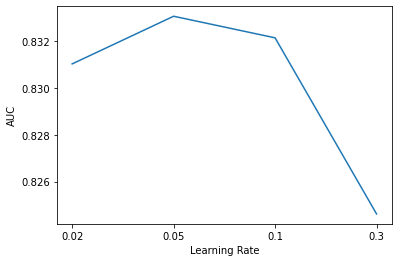

In [104]:
plt.plot([str(i) for i in res.keys()], [i[0] for i in res.values()])
plt.xlabel("Learning Rate")
plt.ylabel("AUC")
plt.plot()

[]

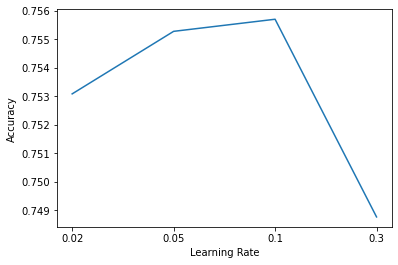

In [105]:
plt.plot([str(i) for i in res.keys()], [i[1] for i in res.values()])
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.plot()

<div dir='rtl'>
    افزایش 
    <code>learning_rate</code>
    سرعت تعلیم را بالا می برد اما از طرفی افزایش بیش از حد آن می تواند به فرار از مینیمم محلی بیانجامد.
</div>

<div dir='rtl'>
حال در اینجا به تاثیر 
    <code>n_estimators</code>
    می پردازیم.
</div>

In [112]:
max_depth = 4
colsample_bytree = 0.8
learning_rate = 0.05
res = dict()

for i, (auc, acc) in enumerate(zip(m.cv_results_['mean_test_AUC'],
                                 m.cv_results_['mean_test_Accuracy'])):
    if m.cv_results_['param_max_depth'][i] == max_depth and \
        m.cv_results_['param_learning_rate'][i] == learning_rate and \
        m.cv_results_['param_colsample_bytree'][i] == colsample_bytree:
        res[m.cv_results_['param_n_estimators'][i]] = (auc, acc)
        
        


[]

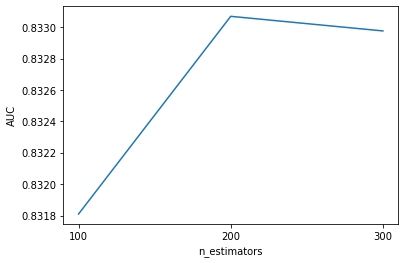

In [113]:
plt.plot([str(i) for i in res.keys()], [i[0] for i in res.values()])
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.plot()



In [ ]:
plt.plot([str(i) for i in res.keys()], [i[1] for i in res.values()])
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.plot()

<div dir='rtl'>
همانطور که دیده می شود افزایش تعداد پیش بینی کننده ها دقت را افزایش می دهد. 
</div>

<div dir='rtl'>
حال در اینجا به تاثیر 
    <code>max_depth</code>
    می پردازیم.
</div>

In [115]:
# max_depth = 4
colsample_bytree = 0.8
learning_rate = 0.05
n_estimators = 200

res = dict()

for i, (auc, acc) in enumerate(zip(m.cv_results_['mean_test_AUC'],
                                 m.cv_results_['mean_test_Accuracy'])):
    if m.cv_results_['param_n_estimators'][i] == n_estimators and \
        m.cv_results_['param_learning_rate'][i] == learning_rate and \
        m.cv_results_['param_colsample_bytree'][i] == colsample_bytree:
        res[m.cv_results_['param_max_depth'][i]] = (auc, acc)
        


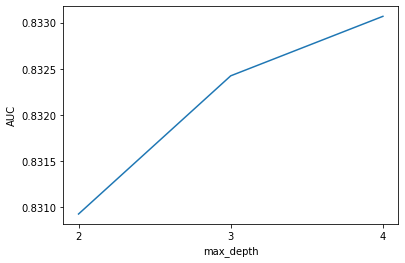

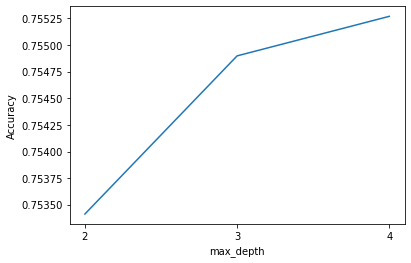

In [117]:
plt.plot([str(i) for i in res.keys()], [i[0] for i in res.values()])
plt.xlabel("max_depth")
plt.ylabel("AUC")
plt.show()

plt.plot([str(i) for i in res.keys()], [i[1] for i in res.values()])
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()

<div dir='rtl'>
    بدیهی است که هر چقدر عمق درخت ها بیشتر باشد دقت نیز بیشتر خواهد بود.
</div>

<div dir='rtl'>
حال در اینجا به تاثیر 
    <code>colsample_bytree</code>
    می پردازیم.
</div>

In [118]:
max_depth = 4
# colsample_bytree = 0.8
learning_rate = 0.05
n_estimators = 200

res = dict()

for i, (auc, acc) in enumerate(zip(m.cv_results_['mean_test_AUC'],
                                 m.cv_results_['mean_test_Accuracy'])):
    if m.cv_results_['param_n_estimators'][i] == n_estimators and \
        m.cv_results_['param_learning_rate'][i] == learning_rate and \
        m.cv_results_['param_max_depth'][i] == max_depth:
        res[m.cv_results_['param_colsample_bytree'][i]] = (auc, acc)
        


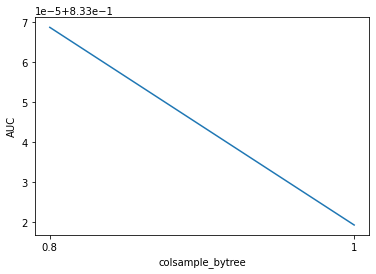

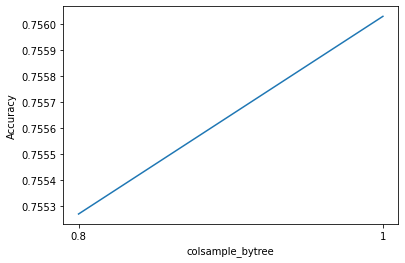

In [120]:
plt.plot([str(i) for i in res.keys()], [i[0] for i in res.values()])
plt.xlabel("colsample_bytree")
plt.ylabel("AUC")
plt.show()

plt.plot([str(i) for i in res.keys()], [i[1] for i in res.values()])
plt.xlabel("colsample_bytree")
plt.ylabel("Accuracy")
plt.show()

In [121]:
[i[0] for i in res.values()]

[0.8330686803135883, 0.8330193473926266]

<div dir='rtl'>
    تاثیر آن در این آزمایش نامحسوس است.
</div>